<a href="https://colab.research.google.com/github/bhagyesh16/datascience/blob/main/police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:


data=pd.read_csv('police.csv')

In [41]:
data

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [43]:
data.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [44]:
print(data.isnull().sum())

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


In [45]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)


stop_date               0.000000
stop_time               0.000000
county_name           100.000000
driver_gender           5.815284
driver_age_raw          5.806564
driver_age              6.127032
driver_race             5.813104
violation_raw           5.813104
violation               5.813104
search_conducted        0.000000
search_type            96.516280
stop_outcome            5.813104
is_arrested             5.813104
stop_duration           5.813104
drugs_related_stop      0.000000
dtype: float64


In [46]:
data.drop(columns=['county_name', 'search_type'], inplace=True)

In [47]:
data.dropna(inplace=True)

In [48]:
data['driver_gender'].fillna(data['driver_gender'].mode()[0], inplace=True)


<ipython-input-48-7136e7d9d488>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['driver_gender'].fillna(data['driver_gender'].mode()[0], inplace=True)


In [49]:
data['driver_gender'].fillna('Unknown', inplace=True)


<ipython-input-49-bbd233724105>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['driver_gender'].fillna('Unknown', inplace=True)


In [50]:
print(data.isnull().sum())


stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64


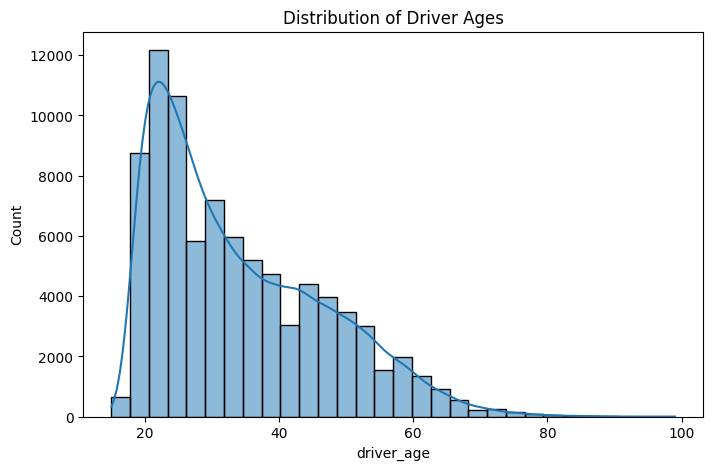

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(data['driver_age'], bins=30, kde=True)
plt.title("Distribution of Driver Ages")
plt.show()


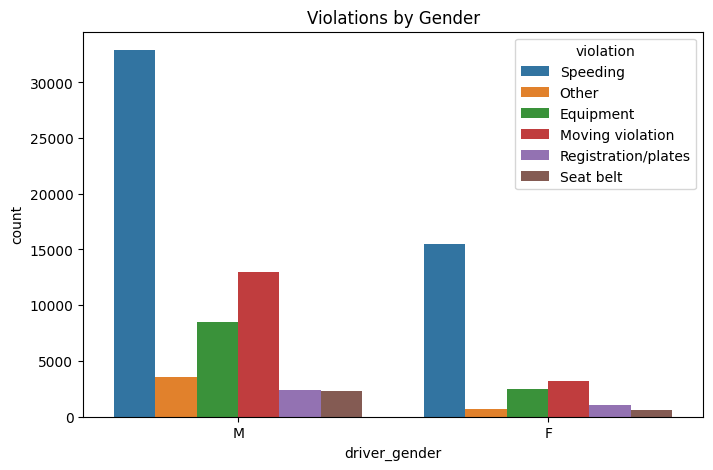

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x='driver_gender', hue='violation', data=data)
plt.title("Violations by Gender")
plt.show()


In [53]:
data['stop_date'] = pd.to_datetime(data['stop_date'], errors='coerce')


In [54]:
numeric_data = data.select_dtypes(include=['number'])  # Keep only numerical columns


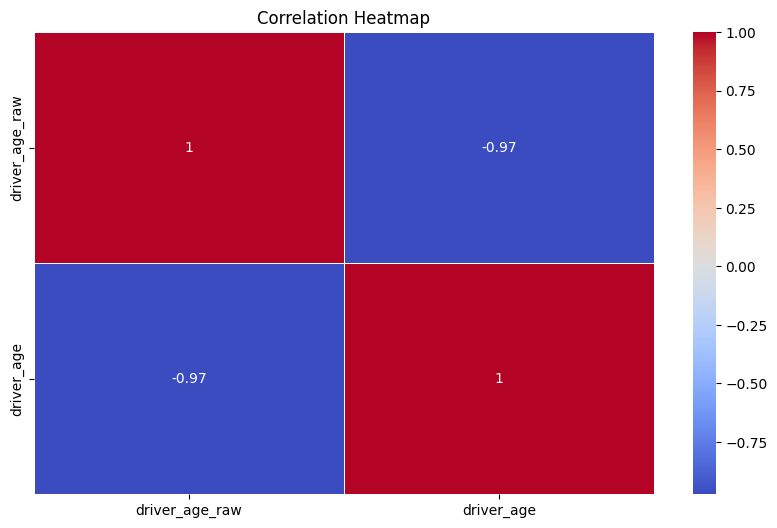

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


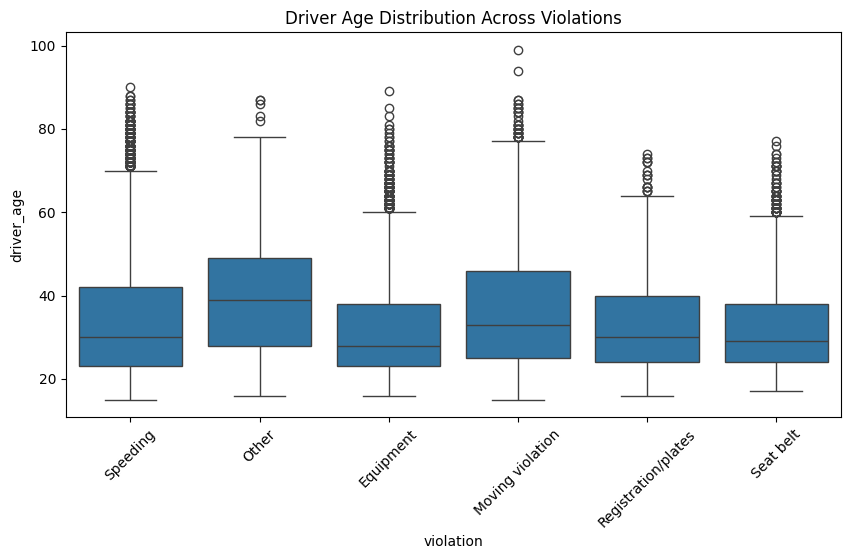

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='violation', y='driver_age', data=data)
plt.title("Driver Age Distribution Across Violations")
plt.xticks(rotation=45)
plt.show()


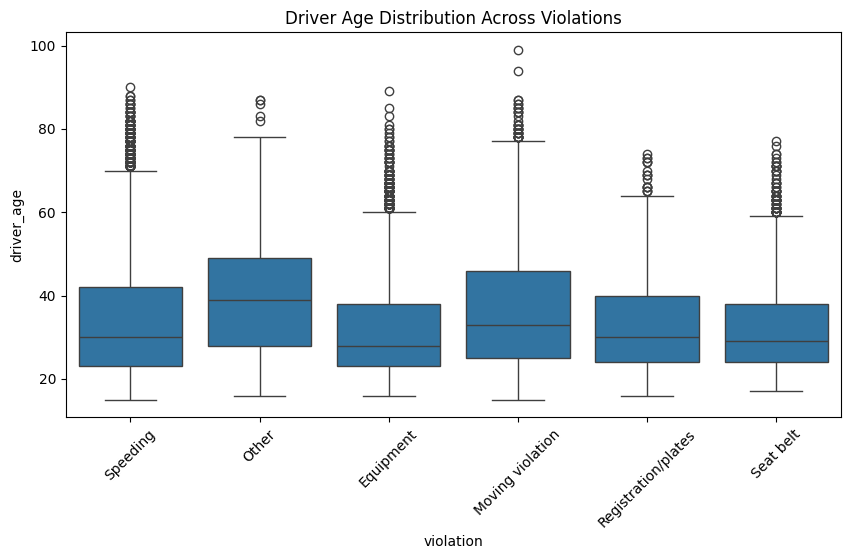

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='violation', y='driver_age', data=data)
plt.title("Driver Age Distribution Across Violations")
plt.xticks(rotation=45)
plt.show()
